In [28]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Método de Euler

$$\frac{dy}{dt} = f(y,t), \, y(0) = y_{0}$$

$$y(t + \Delta t) = y(t) + f(y, t)$$

$$y_{i+1} = y_{i} + f(y_{i}, t_{i})$$

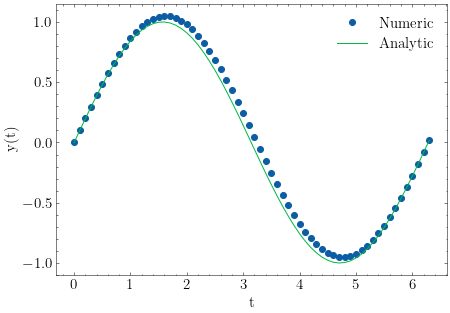

In [29]:
# Método de Euler

dt = 0.1
t = np.arange(0, 2*np.pi + dt, dt)
N = len(t)
y = np.zeros(N)
y[0] = 0

def f(t):
    return np.cos(t)

for i in range(N-1):
    y[i+1] = y[i] + f(t[i])*dt

plt.plot(t, y, marker='o', linestyle='', label="Numeric")
plt.plot(t, np.sin(t), label="Analytic")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## EDO de 2ª Ordem

$$ \frac{d^2 r}{dt^2} = f(r,t)$$

$$ \frac{d r}{dt} = v $$
$$ \frac{d v}{dt} = f $$

$$ r(t + \Delta t) = r(t) + v(t)dt $$
$$ v(t + \Delta t) = v(t) + f(r, t)dt $$

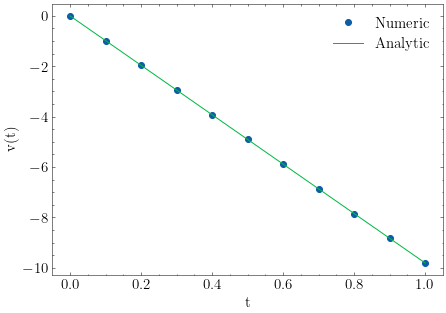

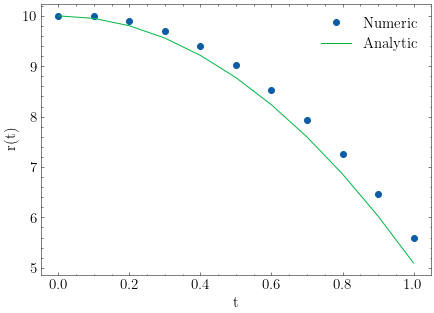

In [32]:
dt = 0.1
t = np.arange(0, 1.0 + dt, dt)
N = len(t)
g = 9.81

r = np.zeros(N)
v = np.zeros(N)

r[0] = 10.0
v[0] = 0.0

def f(g=9.81):
    return -g

for i in range(N - 1):
    v[i+1] = v[i] + f()*dt
    r[i+1] = r[i] + v[i]*dt

plt.plot(t, v, marker='o', linestyle='',label="Numeric")
plt.plot(t, -g*t, label="Analytic")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.show()

plt.plot(t, r, marker='o', linestyle='', label="Numeric")
plt.plot(t, 10.0 - 0.5*g*t**2, label="Analytic")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.legend()
plt.show()

## Método de Euler-Cromer

$$ r(t + \Delta t) = r(t) + v(t + \Delta t)dt $$
$$ v(t + \Delta t) = v(t) + f(r, t)dt $$

In [ ]:
# # Linear drag

# dt = 0.1
# t = np.arange(0, 1.0 + dt, dt)
# N = len(t)
# g = 9.81

# r = np.zeros(N)
# v = np.zeros(N)

# r[0] = 10.0
# v[0] = 0.0

# def f(v, b=1, g=9.81):
#     return -g+ 

# for i in range(N - 1):
#     v[i+1] = v[i] + f()*dt
#     r[i+1] = r[i] + v[i]*dt

# plt.plot(t, v, marker='o', linestyle='',label="Numeric")
# plt.plot(t, -g*t, label="Analytic")
# plt.xlabel('t')
# plt.ylabel('v(t)')
# plt.legend()
# plt.show()

# plt.plot(t, r, marker='o', linestyle='', label="Numeric")
# plt.plot(t, 10.0 - 0.5*g*t**2, label="Analytic")
# plt.xlabel('t')
# plt.ylabel('r(t)')
# plt.legend()
# plt.show()